## Final Project Submission

Please fill out:
* Student name: BRITTA BETTENDORF
* Student pace: FULL TIME
* Scheduled project review date/time: MONDAY, OCT 29 2018, 9:30am CENTRAL TIME
* Instructor name: RAFAEL CARRASCO


## Data Science with the OSEMN Approach

When working on a data science projects, it is beneficial to break it down into smaller manageable pieces and complete them one-by-one. There are multiple of such process models, including OSEMN: It defines data science according to the following five steps: 

    1 - Obtaining the data
    2 - Scrubbing the data
    3 - Exploring the data
    4 - Modeling the data 
    5 - Interpreting the results

Together, these steps form the OSEMN model (which is pronounced as "awesome").

Although the five steps are performed here in a linear and incremental fashion, in practice it is very common to move back and forth between them or to perform multiple steps at the same time. Doing data science is an iterative and non-linear process. For example, once you have modeled your data, and you look at the results, you may decide to go back to the scrubbing step to the adjust the features of the data set. 

## Project: House Sales in King County, USA

### Business understanding (for non US-citizens only 😉 )

King County is a county located in the U.S. state of Washington. The population was 2,188,649 in the 2017 census estimate. King is the most populous county in Washington, and the 13th-most populous in the United States. The county seat is Seattle, which is the state's largest city.

King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area. (The others are Snohomish County to the north, and Pierce County to the south.) About two-thirds of King County's population lives in Seattle's suburbs. 

King County, USA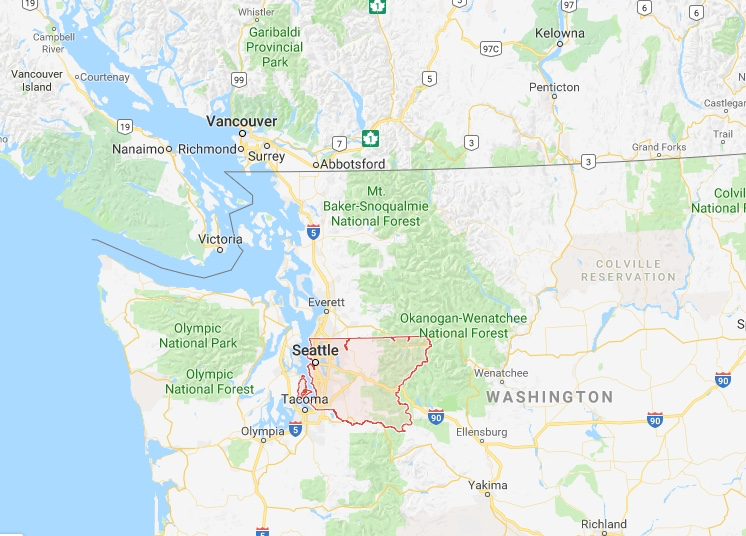

## 1 - Obtaining the data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import seaborn as sns

In [2]:
# read data into a DataFrame and check first 5 rows
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# check the shape and get a concise summary of the data
print('*** Shape ***')
print(df.shape)
print('\n*** Summary Metadata ***')
print(df.info())

*** Shape ***
(21597, 21)

*** Summary Metadata ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int

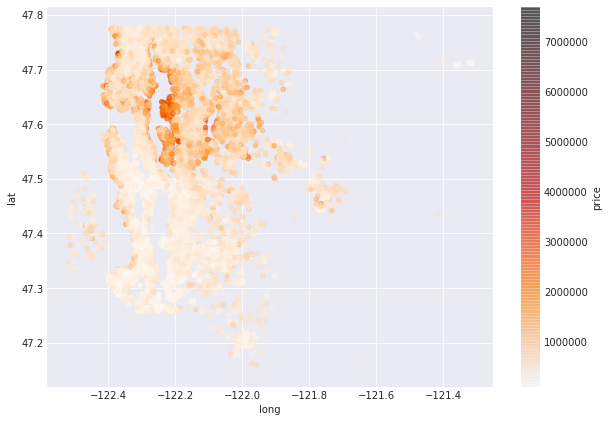

In [4]:
# let’s color code from the most expensive to the least expensive areas:
df.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

**This image tells us that the most important houses were sold at the waterfront. What a surprise ... !**

### Summary of Step 1

What do we have?
- We have 21,597 records and 21 columns.
- The variable we are going to predict is the `price`. This is the dependent or target variable.
- There are columns with null values (e.g. `waterfront`) or wrong datatypes (e.g. `sqft_basement`).

What does all the columns mean (according to kaggle.com)?
- **id** = a notation for a house
- **date** = Date house was sold
- **price** = Price is prediction target
- **bedrooms** = Number of Bedrooms/House
- **bathrooms** = Number of bathrooms/bedrooms
- **sqft_living** = square footage of the home
- **sqft_lot** = square footage of the lot
- **floors** = Total floors (levels) in house
- **waterfront** = House which has a view to a waterfront
- **view** = Has been viewed
- **condition** = How good the condition is (Overall)
- **grade** = overall grade given to the housing unit, based on King County grading system
- **sqft_above** = square footage of house apart from basement
- **sqft_basement** = square footage of the basement
- **yr_built** = Built Year
- **yr_renovated** = Year when house was renovated
- **zipcode** = zip
- **lat** = Latitude coordinate
- **long** = Longitude coordinate
- **sqft_living15** = Living room area in 2015 (implies -- some renovations) This might or might not have affected the lotsize area
- **sqft_lot15** = lotSize area in 2015 (implies -- some renovations)

### Questions about the data

- What features are most important in predicting the price of a house? What matters more: the "height" of a house, measured in floors - or the "width", measured in squarefoot of either only inside or inside plus outside? 
    - *This hopefully will be answered by multiple regression later.*
- Does the number of views of a house affect the price in any way? Are houses that are viewed several times more expensive?
- Does it make a difference in the price if there was a renovation shortly?
- Houses by the water may likely to reach higher prices. But does houses by the water perhaps have other attributes that seperate them from the rest? Are they bigger or in a better shape or more rooms?
- Given a similar rated condition and year of origin: Do people pay more for older or for modern houses?

## 2 - Scrubbing the data
**2.1** - Subsampling <br> **2.2** - Dealing with datatypes <br> **2.3** - Dealing with null values <br> **2.4** - Checking for multicollinearity <br> **2.5** - Remove unnecessary columns 

### 2.1 - Subsampling

In [5]:
# no need to subsample as dataset is not that large 

### 2.2 - Dealing with datatypes

In [6]:
# check all datatypes first
print('\n*** Data Types ***\n')
print(df.dtypes)


*** Data Types ***

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


**a) The 3 features `waterfront`, `condition` and `grade` are likely to be categorical datatypes mistakenly encoded as numeric data:**

In [7]:
print(df.waterfront.describe())
print('\n*** Unique Values ***')
print(df.waterfront.unique())

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

*** Unique Values ***
[nan  0.  1.]


Yes. Values range from 0 to 1, moreover, actually the only values that are in the dataset are 0 and 1! It is obvious that `waterfront` is a categorical variable and does not represent a continuous number but refers to a simple "yes" or "no".

In [8]:
print(df.condition.describe())
print('\n*** Unique Values ***')
print(df.condition.unique())

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

*** Unique Values ***
[3 5 4 1 2]


It's the same with `condition`: it's clearly categorical with 5 different options.

In [9]:
print(df.grade.describe())
print('\n*** Unique Values ***')
print(df.grade.unique())

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

*** Unique Values ***
[ 7  6  8 11  9  5 10 12  4  3 13]


And also `grade` is - merely by name - a categorical variable with numbers ranging from 3 to 13.

In [10]:
# Strategy: cast both to strings as EDA is much simpler with strings ...
# ... and shortly before regression one-hot encode this categorical data 

df.waterfront = df.waterfront.astype('str')
df.condition = df.condition.astype('str')
df.grade = df.grade.astype('str')

# en passant, the 2376 NaN's in 'waterfront' are also binned in its own category --> NaN-issue solved

**b) The feature `view` counts the times a house has been viewed and therefore should be an integer, not a float as it is currently:**

In [11]:
print('\n*** Unique Values ***')
print(df.view.unique())
print('\n*** Value Counts ***')
print(df.view.value_counts())
print('\n*** Sum of null values ***')
print(df.view.isna().sum())
# --> we have to take care of the 63 NaN's first, as they cannot be converted


*** Unique Values ***
[ 0. nan  3.  4.  2.  1.]

*** Value Counts ***
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

*** Sum of null values ***
63


In [12]:
# Strategy: convert all NaN's into 0 as this is the most common category ...
df.view.fillna(0, inplace=True)
print('\n*** Unique Values ***')
print(df.view.unique())

# ... and then cast the column into an integer datatype
df.view = df.view.astype('int64')


*** Unique Values ***
[0. 3. 4. 2. 1.]


**c) The feature `yr_renovated` is also currently a float, but should be an integer as the sister feature `yr_built`:**

In [13]:
print('\n*** Unique Values ***')
print(df.yr_renovated.unique())
print()

# compare statistics of 'yr_built' and 'yr_renovated'
subsets = ['yr_built', 'yr_renovated']
df[subsets].describe()


*** Unique Values ***
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]



,yr_built,yr_renovated
count,21597.000000,17755.000000
mean,1970.999676,83.636778
std,29.375234,399.946414
min,1900.000000,0.000000
25%,1951.000000,0.000000
50%,1975.000000,0.000000
75%,1997.000000,0.000000
max,2015.000000,2015.000000


In [14]:
# feature contains also many NaN's
df.yr_renovated.isna().sum()

3842

My assumption is, both *NaN* and *0.0* values serve as placeholders in `yr_renovated`: All houses that actually never got a renovation, have a value equal to either *NaN* or *0.0*. 

So before cast the datatype to int, I first deal with the *NaN's* resp. *0.0*. My strategy is to bin this numeric variable  into a new column named `yr_ren_cat`: 
- (1) Houses with a current value of *0.0* (placeholder) were never renovated and fall into the newly created category "never".
- (2) The same is true for houses with a value of *NaN*.
- (3) Finally, houses that are renovated before 1950, cannot really be named "renovated" anymore and therefore fall also into "never". 

So it might become a large new category! And now there's no need (and no option) to cast the original column to an int datatype.

In [15]:
# Binning
bins = [0., 1950., 1980., 1990., 2000., 2015.]
names = ['never', 'before 1980', '1980-1989', '1990-1999', '2000-2015']
df['yr_ren_cat'] = pd.cut(df['yr_renovated'], bins, labels=names, right=False)

print('\n*** Unique Values ***')
print(df.yr_ren_cat.unique())
print('\n*** Value Counts ***')
print(df.yr_ren_cat.value_counts())


*** Unique Values ***
[never, 1990-1999, NaN, 2000-2015, before 1980, 1980-1989]
Categories (5, object): [never < before 1980 < 1980-1989 < 1990-1999 < 2000-2015]

*** Value Counts ***
never          17020
2000-2015        365
1990-1999        143
1980-1989        124
before 1980       89
Name: yr_ren_cat, dtype: int64


In [16]:
# checking the sum of null values
df.yr_ren_cat.isna().sum()

3856

In [17]:
# now fill the null values by packing them into category 'never'
df.yr_ren_cat.fillna('never', inplace=True)

print('\n*** Value Counts ***')
print(df.yr_ren_cat.value_counts())


*** Value Counts ***
never          20876
2000-2015        365
1990-1999        143
1980-1989        124
before 1980       89
Name: yr_ren_cat, dtype: int64


In [18]:
# checking the sum of null values again
df.yr_ren_cat.isna().sum()
# All done!

0

**d) The feature `sqft_basement` should be numeric as all other sqft-features but is currently stored as a string:**

In [19]:
# check the unique values
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

There are questionmarks amongst numbers which most probably caused the string format!

In [20]:
len(df.query("sqft_basement == '?'"))
# there are 454 of these questionmarks set as values

454

In [21]:
# convert the '?' in '0' as I don't want to falsify the data by (maybe wrongly?) replacing it with median etc.
df.sqft_basement.replace(['?'], '0', inplace=True)

# then cast it to an float and to an int-datatype
df.sqft_basement = df.sqft_basement.astype('float').astype('int')

# check datatype and unique values
print('*** Datatype ***: ', df.sqft_basement.dtype)
print('\n*** Unique Values ***')
print(df.sqft_basement.unique())

*** Datatype ***:  int64

*** Unique Values ***
[   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  710  840  380  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
  280  870 1100  460 1400  660 1220  900  420 1580 1380  475  690  270
  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470  370
  140 1760  130  520  890 1110  150 1720  810  190 1290  670 1800 1120
 1810   60 1050  940  310  930 1390  610 1830 1300  510 1330 1590  920
 1320 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520 1850
 1660 2130 2600 1690  243 121

**Check all datatypes finally:**

In [22]:
print('\n*** Data Types ***\n')
print(df.dtypes)


*** Data Types ***

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront         object
view                int64
condition          object
grade              object
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
yr_ren_cat       category
dtype: object


### 2.3 - Dealing with null values

The NaN's in `waterfront` and `view` have already been dealt with in the chapter above. And the NaN's in `yr_renovated` have been bucketed into a new column. So there are no null values left:

In [23]:
print('\n*** Null Values ***\n')
print(df.isna().sum())


*** Null Values ***

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
yr_ren_cat          0
dtype: int64


### 2.4 - Checking for multicollinearity

To understand the correlation structure of the predictors, I'll take a copy of the data but without the target variable `price` and without `id` and `date`.

In [24]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_ren_cat
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,nan,0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,never


In [25]:
df_preds = df.iloc[:,3:]
df_target = df.iloc[:,2:3]

df_preds.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_ren_cat
0,3,1.0,1180,5650,1.0,nan,0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,never


In [26]:
# building a correlation matrix
df_preds.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.479386,0.297229,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,0.686668,0.278485,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,0.876448,0.428660,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075054,0.184139,0.015031,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,0.523989,-0.241866,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
view,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.166017,0.270629,-0.054452,0.100977,0.085059,0.006321,-0.077702,0.278928,0.073083
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.166017,1.000000,-0.051175,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_basement,0.297229,0.278485,0.428660,0.015031,-0.241866,0.270629,-0.051175,1.000000,-0.130085,0.071190,0.073271,0.109853,-0.142369,0.199288,0.015885
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.054452,0.424037,-0.130085,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.018495,0.051050,0.055660,0.004513,0.003535,0.100977,0.022137,0.071190,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


**Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. If I take 0.75 as a cut-off, how many high correlations do I have?**

In [27]:
abs(df_preds.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


It seems like the variable `sqft_living` highly correlates with three others:
- `bathrooms`, 
- `sqft_above` and
- `sqft_living15`. 

In my analysis, I will have to decide to remove three of these four variables because uncorrelated independent variables is one of OLS linear regression assumptions. 

Additionally, it would be nice here to have an easy visual of the correlation matrix - such is the Seaborn heatmap:

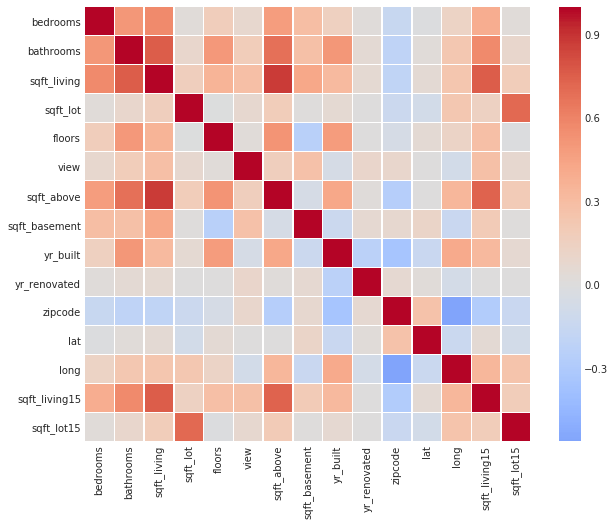

In [28]:
# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,8))
# draw the heatmap
sns.heatmap(df_preds.corr(), center=0, linewidths=.5, cmap="coolwarm");

### 2.5 - Remove unnecessary columns

- The columns `id`, `date` and `zipcode` ,`latitude` and `longitude`are not needed for further investigation and can be dropped. 
- Next, due to multicollinearity I decide to drop `sqft_living`, `bathrooms` and `sqft_above`.
- And finally I skip `yr_renovated` because I created an additional categorical variable for this feature.

In [29]:
# as I may drop columns from time to time, I better write a little function for this:
def drop_cols(columns, df):
    '''Takes a dataframe and columns as arguments.
    Returns an altered dataframe where all the columns 
    passed in are permanently removed.'''
    return df.drop(columns, axis=1, inplace=True)

In [30]:
# use the drop_cols function
drop_cols(['id', 'date',  'zipcode', 'sqft_living', 'bathrooms', 'sqft_above', 'yr_renovated', 'lat', 'long'], df)
df.head(2)

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15,yr_ren_cat
0,221900.0,3,5650,1.0,nan,0,3,7,0,1955,1340,5650,never
1,538000.0,3,7242,2.0,0.0,0,3,7,400,1951,1690,7639,1990-1999


### Summary of Step 2 
What did I do?
- I dealt with wrong datatypes and null values.
- I checked the predictor variables for multicollinearity and removed columns that were correlated with each other.
- Finally, for reasons of clarity some more columns were dropped and I work with a new dataframe that has 13 columns instead of the initial 21.

## 3 - Exploring the data
**3.1** - Describing the dataset (Numerical Variables, Categorical Variables) <br> **3.2** - Searching for answers to my questions
### 3.1 - Describing the dataset

**a) Describing NUMERICAL variables using 5 point statistics, boxplots and histograms:**

In [31]:
# build a subset of numerical variables
subsets = ['price', 'bedrooms', 'sqft_lot', 'floors', 'view', 'sqft_basement', 
           'yr_built', 'sqft_living15', 'sqft_lot15']

# make the statistics easier to read and understand
data_descriptives = round(df[subsets].describe(), 3)
data_descriptives

,price,bedrooms,sqft_lot,floors,view,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,540296.574,3.373,15099.409,1.494,0.233,285.717,1971.000,1986.62,12758.284
std,367368.140,0.926,41412.637,0.540,0.765,439.820,29.375,685.23,27274.442
min,78000.000,1.000,520.000,1.000,0.000,0.000,1900.000,399.00,651.000
25%,322000.000,3.000,5040.000,1.000,0.000,0.000,1951.000,1490.00,5100.000
50%,450000.000,3.000,7618.000,1.500,0.000,0.000,1975.000,1840.00,7620.000
75%,645000.000,4.000,10685.000,2.000,0.000,550.000,1997.000,2360.00,10083.000
max,7700000.000,33.000,1651359.000,3.500,4.000,4820.000,2015.000,6210.00,871200.000


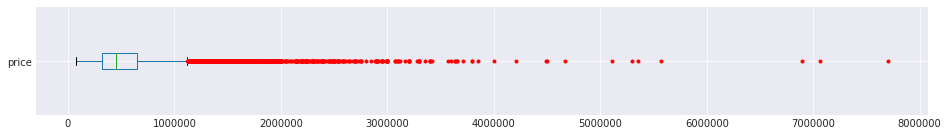

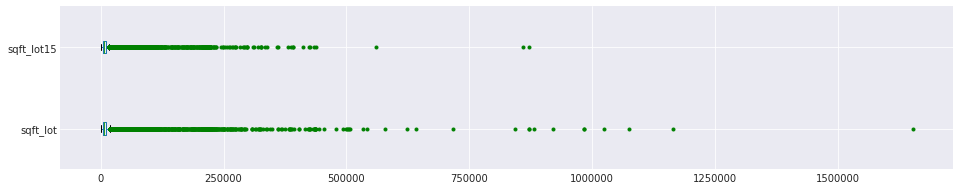

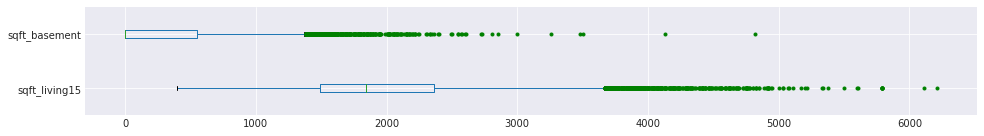

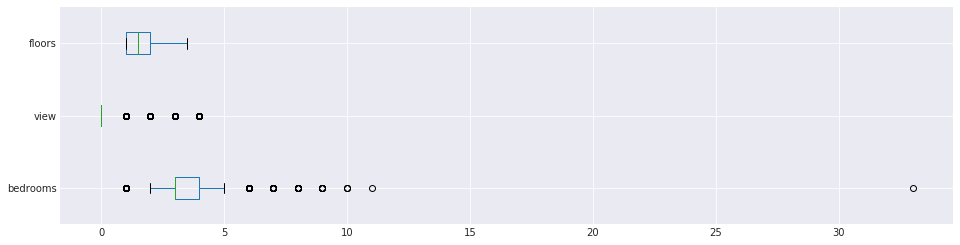

In [32]:
# prepare specific outlier symbols
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
green_diamond = dict(markerfacecolor='g', markeredgecolor='g', marker='.')

# plot those variables in one boxplot that have a similar scale and use the created outlier symbols
df['price'].plot(kind='box', vert=False, flierprops=red_square, figsize=(16,2));
df[['sqft_lot', 'sqft_lot15']].plot(kind='box', vert=False, flierprops=green_diamond, figsize=(16,3));
df[['sqft_living15', 'sqft_basement']].plot(kind='box', vert=False, flierprops=green_diamond, figsize=(16,2));
df[['bedrooms', 'view', 'floors']].plot(kind='box', vert=False, figsize=(16,4));

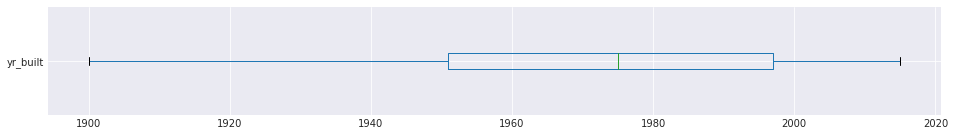

In [33]:
df['yr_built'].plot(kind='box', vert=False, figsize=(16,2));

**Observations:**
- `price`: The standard deviation is enormous, but 75% of all houses have prices between 78,000 and 645,000.
- `sqft_lot15` and `sqft_lot` seem to be quiet similar: both with a huge standard deviation, but `sqft_lot15` with a smaller range. It could be considered to work only with the latest squarefoot information: `sqft_lot15`.
- `sqft_living15`: The IQR is quiet straightforward with severe outliers. Same is true for `sqft_basement`.
- `floors` are simply ranged around the mean of 1.5
- `view`: At least 75% of the houses have not been viewed before selling.
- `bedrooms`: The range is between 1 and 33 rooms with most of the houses having not more than 4 bedrooms. There are some outliers.
- `yr_built`: 50% of the houses were built between 1951 and 1997. No outliers present.
- I'm a bit concerned about all these severe outliers in most of the variables due to later regression and would consider to fit the model a) without removing them and b) after removing them.

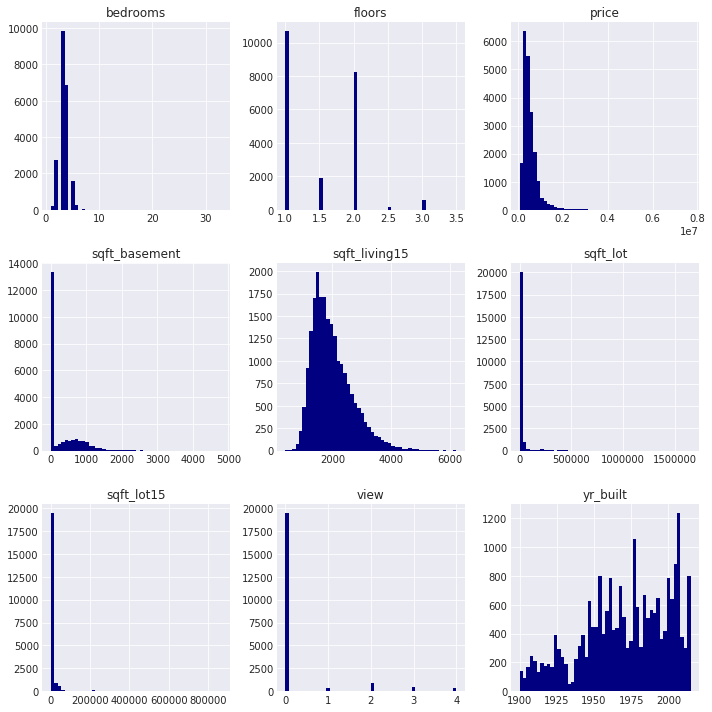

In [34]:
# Histograms
fig = df[subsets].hist(bins=50, color='navy', figsize=(10,10), grid=True)
plt.tight_layout();

**Observations:**
- None of the variables is normally distributed. Some of the histograms are a little bit right skewed instead, but this is not abnormal.

**b) Exploring CATEGORICAL variables using bar charts:**

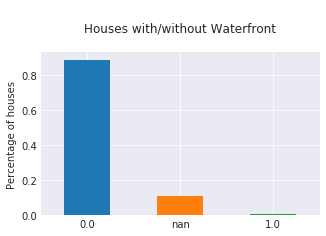

In [35]:
# variable "waterfront"
df.waterfront.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nHouses with/without Waterfront\n", figsize=(5,3))
plt.ylabel('Percentage of houses');

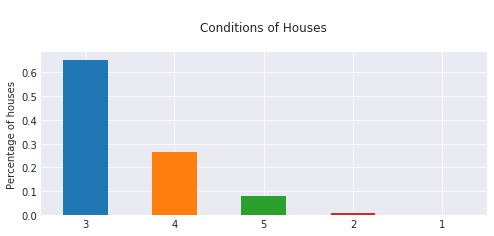

In [36]:
# variable "condition"
df.condition.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                   title="\nConditions of Houses\n", figsize=(8,3))
plt.ylabel('Percentage of houses');

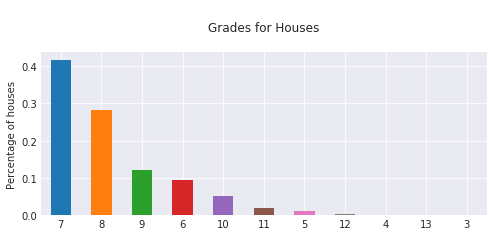

In [37]:
# variable "grade"
df.grade.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                   title="\nGrades for Houses\n", figsize=(8,3))
plt.ylabel('Percentage of houses');

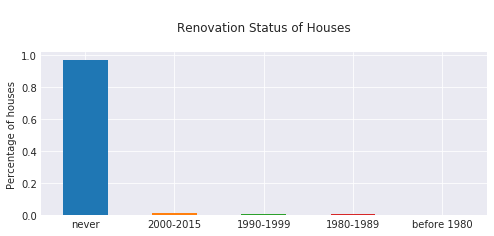

In [38]:
# newly created variable "yr_ren_cat" (period of renovation)
df.yr_ren_cat.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nRenovation Status of Houses\n", figsize=(8,3))
plt.ylabel('Percentage of houses');

**Observations:**
- Waterfront: Only 0,6% (!) of all houses are located at the water.
- Condition: Most houses are in condition 3, 4 or 5.
- Grades: Around 2/3 of the houses are rated 7 or 8.
- Renovation Status: 97% of all building never were renovated.

### 3.2 - Searching for answers to my questions

**Question 1: Does the times a house was viewed affect the price in any way? Are houses that are viewed several times more or less expensive?**

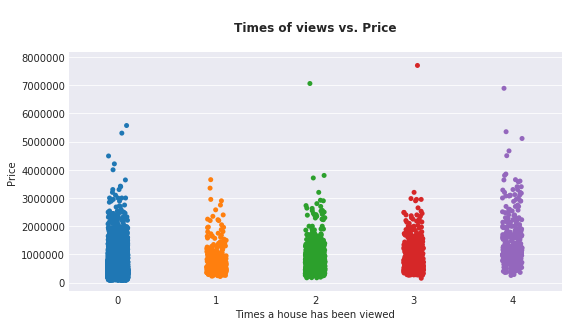

In [39]:
sns.catplot(x="view", y="price", data=df, height=4, aspect=2)
plt.title('\nTimes of views vs. Price\n', fontweight='bold')
plt.xlabel('Times a house has been viewed')
plt.ylabel('Price');

**Conclusion 1:**
- It seems as if the price range is less after 1 visit compared to no visit, but spreads upward a bit after the 4th visit.

**Question 2: Does it make a difference in the price if there was a renovation shortly?**

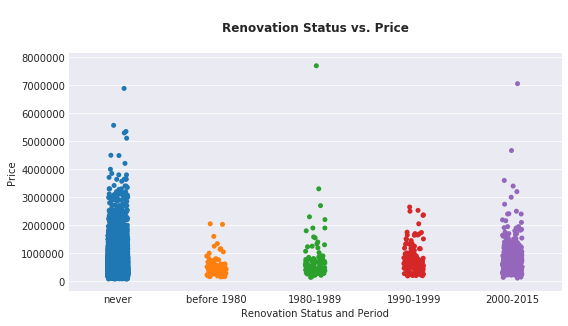

In [40]:
sns.catplot(x="yr_ren_cat", y="price", data=df, height=4, aspect=2)
plt.title('\nRenovation Status vs. Price\n', fontweight='bold')
plt.xlabel('Renovation Status and Period')
plt.ylabel('Price');

**Conclusion 2:**
- Leaving all the 97% never renovated houses aside, it looks like the more recent the renovation happened the more the prices spread upwards.

**Question 3: Houses by the water may likely to reach higher prices. But does houses by the water perhaps have other attributes that seperate them from the rest and increase their value? Are they bigger or in a better shape or more rooms?**

In [41]:
# seperate the df into two: one with houses at the waterfront, the other without
df_waterfront = df[df['waterfront'] == '1.0']
print('Shape of dataframe with waterfront:')
print(df_waterfront.shape)

df_no_waterfront = df[df['waterfront'] != '1.0']
print('\nShape of dataframe without waterfront:')
print(df_no_waterfront.shape)

Shape of dataframe with waterfront:
(146, 13)

Shape of dataframe without waterfront:
(21451, 13)


In [42]:
# get statistics for houses with waterfront
subset = ['price', 'bedrooms', 'floors', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']
waterfront_descriptives = round(df_waterfront[subset].describe(), 2)
waterfront_descriptives

,price,bedrooms,floors,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,146.00,146.00,146.00,146.00,146.00,146.00,146.00
mean,1717214.73,3.35,1.63,728.46,1962.28,2682.83,22893.70
std,1145384.86,1.10,0.55,808.01,27.12,808.41,23264.09
min,285000.00,1.00,1.00,0.00,1905.00,750.00,3230.00
25%,827500.00,3.00,1.00,0.00,1941.25,2075.00,11991.50
50%,1510000.00,3.00,2.00,535.00,1959.50,2695.00,16260.50
75%,2282500.00,4.00,2.00,1265.00,1984.75,3140.00,24537.50
max,7060000.00,6.00,3.00,4820.00,2014.00,4913.00,192268.00


In [43]:
# get statistics for houses without waterfront
no_waterfront_descriptives = round(df_no_waterfront[subset].describe(), 2)
no_waterfront_descriptives

,price,bedrooms,floors,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,21451.00,21451.00,21451.00,21451.00,21451.00,21451.00,21451.00
mean,532286.22,3.37,1.49,282.70,1971.06,1981.88,12689.30
std,342808.19,0.93,0.54,434.74,29.38,681.91,27287.29
min,78000.00,1.00,1.00,0.00,1900.00,399.00,651.00
25%,320000.00,3.00,1.00,0.00,1952.00,1480.00,5100.00
50%,450000.00,3.00,1.50,0.00,1975.00,1830.00,7601.00
75%,640000.00,4.00,2.00,540.00,1997.00,2356.00,10025.50
max,7700000.00,33.00,3.50,4130.00,2015.00,6210.00,871200.00


In [44]:
# concat both statistics
pd.concat([waterfront_descriptives, no_waterfront_descriptives], axis=1, 
          keys = ['🌊 Waterfront Houses Statistics',
                  '⛰ No Waterfront Houses Statistics'])

🌊 Waterfront Houses Statistics                                          \
                               price bedrooms  floors sqft_basement yr_built   
count                         146.00   146.00  146.00        146.00   146.00   
mean                      1717214.73     3.35    1.63        728.46  1962.28   
std                       1145384.86     1.10    0.55        808.01    27.12   
min                        285000.00     1.00    1.00          0.00  1905.00   
25%                        827500.00     3.00    1.00          0.00  1941.25   
50%                       1510000.00     3.00    2.00        535.00  1959.50   
75%                       2282500.00     4.00    2.00       1265.00  1984.75   
max                       7060000.00     6.00    3.00       4820.00  2014.00   

                               ⛰ No Waterfront Houses Statistics            \
      sqft_living15 sqft_lot15                             price  bedrooms   
count        146.00     146.00                          21451.00  21451.00   
mean        2682.83   22893.70                         532286.22      3.37   
std          808.41   23264.09                         342808.19      0.93   
min          750.00    3230.00                          78000.00      1.00   
25%         2075.00   11991.50                         320000.00      3.00   
50%         2695.00   16260.50                         450000.00      3.00   
75%         3140.00   24537.50                         640000.00      4.00   
max         4913.00  192268.00                        7700000.00     33.00   

                                                                  
         floors sqft_basement  yr_built sqft_living15 sqft_lot15  
count  21451.00      21451.00  21451.00      21451.00   21451.00  
mean       1.49        282.70   1971.06       1981.88   12689.30  
std        0.54        434.74     29.38        681.91   27287.29  
min        1.00          0.00   1900.00        399.00     651.00  
25%        1.00          0.00   1952.00       1480.00    5100.00  
50%        1.50          0.00   1975.00       1830.00    7601.00  
75%        2.00        540.00   1997.00       2356.00   10025.50  
max        3.50       4130.00   2015.00       6210.00  871200.00

**Conclusion 3:**
- I guessed right: While 75% of waterfront houses reach a price up to 2.3 Million, houses not located at the water reach "only" 640,000.
- Houses at the water do not differ with regards to bedrooms and floors, but often were built years earlier than others. "Claim your place!"
- But both inside and outside, houses at the water are usually bigger and larger in terms of square footage.

**Question 4: Given a similar rated condition and year of origin: Do people pay more for older or for modern houses?**

In [45]:
df.yr_built.describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [46]:
# To answer this question, it's best to build a new variable (feature engineering) ...
df['yr_built_cat'] = df['yr_built'].apply(lambda x: ('ancient' if x <= 1950 else 'middle-aged') if x <= 2000 else 'modern')

# ... and turn it into a category
df['yr_built_cat'] = pd.Categorical(df['yr_built_cat'], categories = ['ancient', 'middle-aged', 'modern'])
df.head(2)

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15,yr_ren_cat,yr_built_cat
0,221900.0,3,5650,1.0,nan,0,3,7,0,1955,1340,5650,never,middle-aged
1,538000.0,3,7242,2.0,0.0,0,3,7,400,1951,1690,7639,1990-1999,middle-aged


In [47]:
# now group by condition and by category of building year, then take the median price
df_grouped = pd.DataFrame(df.groupby(['condition', 'yr_built_cat'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)
df_grouped

,condition,yr_built_cat,price
0,1,ancient,252000.0
1,1,middle-aged,372500.0
2,2,ancient,255000.0
3,2,middle-aged,285500.0
4,3,ancient,437500.0
5,3,middle-aged,430000.0
6,3,modern,500000.0
7,4,ancient,485000.0
8,4,middle-aged,420000.0
9,4,modern,459500.0


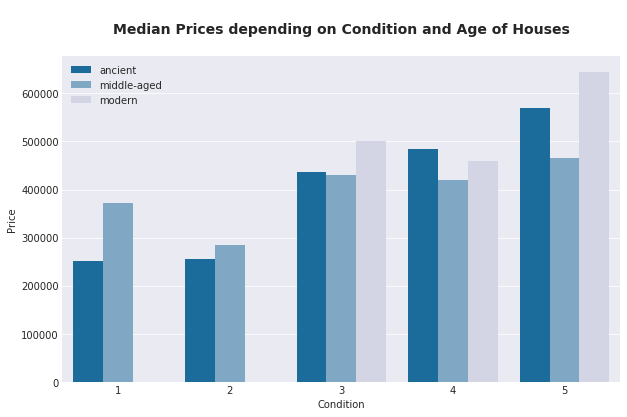

In [48]:
# plot this dataframe with seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='condition', y='price', hue='yr_built_cat', data=df_grouped, palette="PuBu_r")

# add title, legend and informative axis labels
ax.set_title('\nMedian Prices depending on Condition and Age of Houses\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Price', xlabel='Condition')
ax.legend(loc=2);

**Conclusion 4:**:
- Modern houses never get a low ranking of 1 or 2, they get at least 3.
- Within the middle and highly ranked building, the median price for modern houses is higher than for older. Within the 4-ranked buildings, the modern houses have a median price slightly below ancient houses.
- The overall picture suggests, people in general pay more for modern houses than for old ones.

## 4 - Modeling the data
**4.1** - Assumptions of OLS Linear Regression (Normality, Linearity, Multicollinearity of Independent Variables) <br> **4.2** - One-hot encoding of categorical data <br> **4.3** - Fitting the Model <br> **4.4** - Train/Test-Split <br> **4.5** - Cross Validation <br> **4.6** - Assumption of OLS Linear Regression (Normality & Homoscedasticity of Residuals)

### 4.1 - Assumptions of OLS Linear Regression (that can be tested BEFORE analysis)

### a) Normality

Normality assumption requires variables to be normally distributed for concluding some sort of statistical significance. It also requires that the calculated error values follow a normal distribution to produce unbiased estimates with the minimum variance - for that later after the regression. 

However, **this assumption is not mandatory for regression if you don't want to do any hypothesis testing**. OLS works fine for non-normal data distributions in the context of prediction.

The easiest way to check for this assumption is with histograms, Kernel Density Estimate plot (KDE) or Q-Q-Plots. 

In [49]:
df.head(2)

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15,yr_ren_cat,yr_built_cat
0,221900.0,3,5650,1.0,nan,0,3,7,0,1955,1340,5650,never,middle-aged
1,538000.0,3,7242,2.0,0.0,0,3,7,400,1951,1690,7639,1990-1999,middle-aged


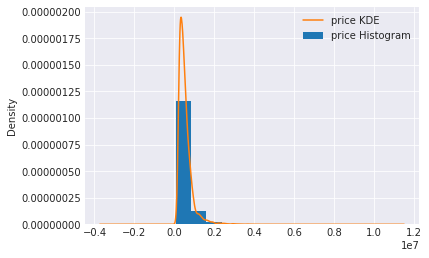

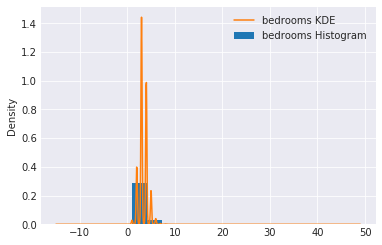

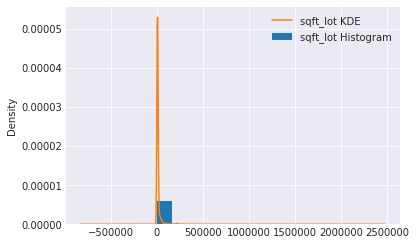

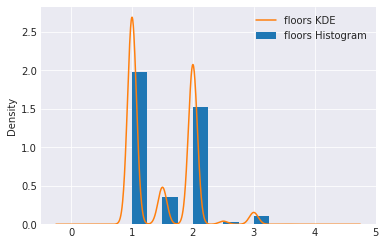

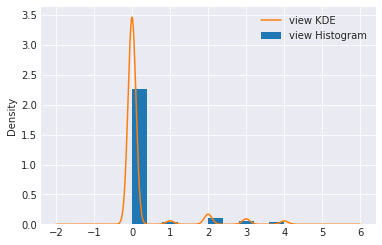

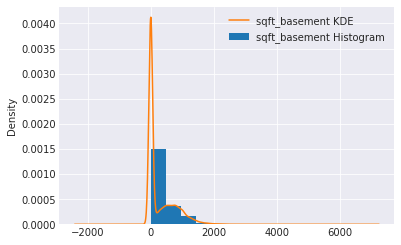

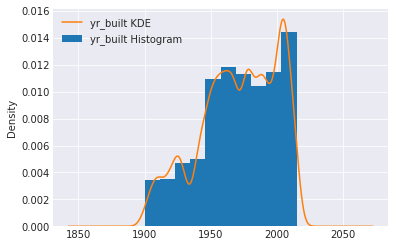

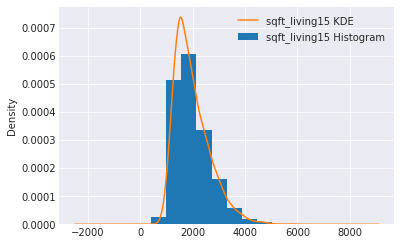

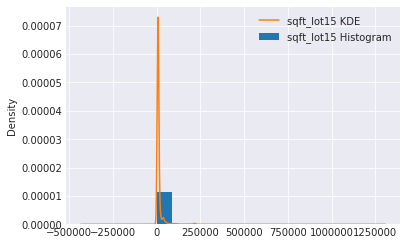

In [50]:
for column in ['price', 'bedrooms', 'sqft_lot', 'floors', 'view', 'sqft_basement', 'yr_built', 
               'sqft_living15', 'sqft_lot15']:
    df[column].plot.hist(density=True, label=column + ' Histogram')
    df[column].plot.kde(label=column + ' KDE')
    plt.legend()
    plt.show()

**Observations:**
- None of the variables is "perfectly" normal, but most tend to follow an overall normal pattern. As OLS works fine for non-normal data distributions in the context of prediction, I decide not to normalize my data - at least for the time being.

### b) Linearity

Linearity assumption requires that there should be a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant. **Scatterplots** can show whether there is a linear or non-linear relationship. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


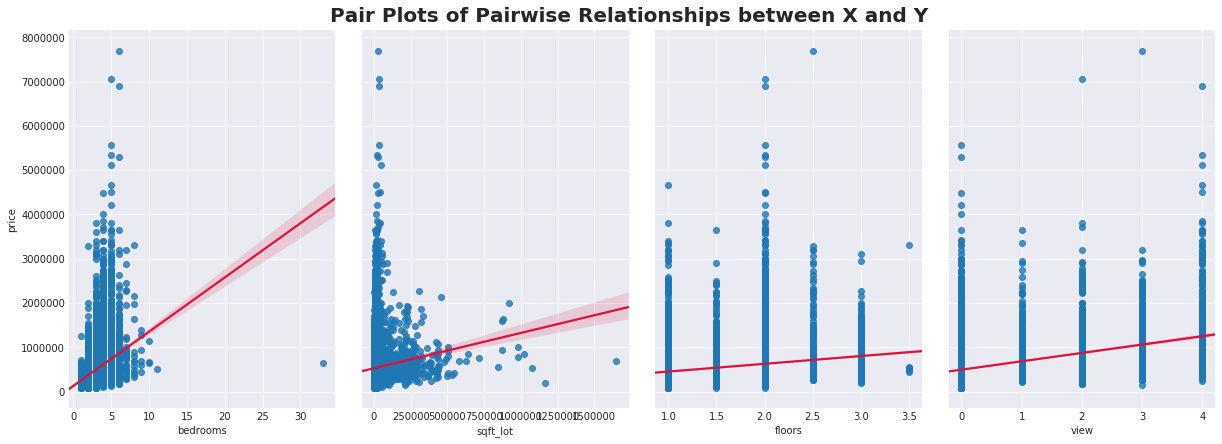

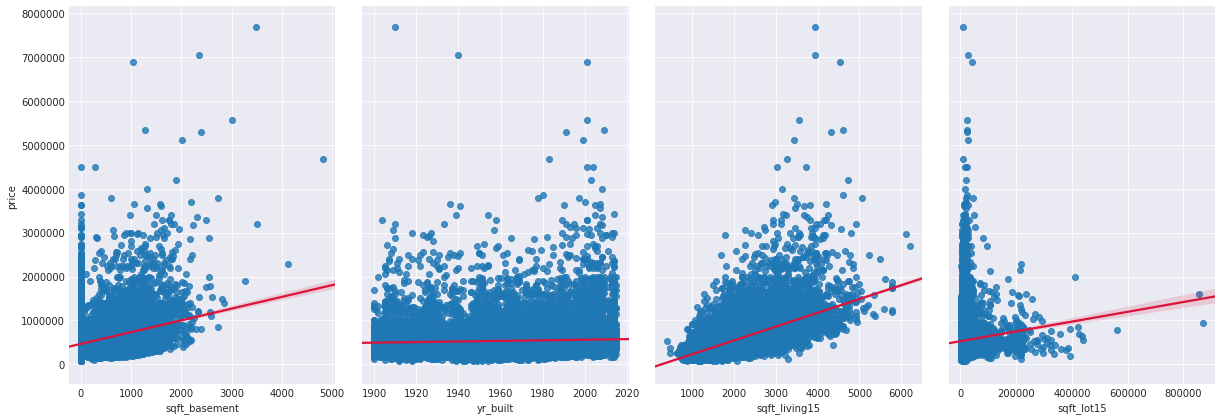

In [51]:
# visualize the pairwise relationship between the features and the response using pairplots (seaborn scatterplots)

sns.pairplot(x_vars=['bedrooms', 'sqft_lot', 'floors', 'view'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)

sns.pairplot(x_vars=['sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)
plt.show();

**Observations:**
- All variables show a more or less slight positive relationship with the target - except `yr_built` where the line is just flat.
- Before diving into a more complex linear regression analysis, let’s look at how much each independent variable correlates with the dependent variable using a **correlation matrix** and just focus on a few promising variables, that seem the most correlated with the price.

In [52]:
# plot correlation matrix
corr_matrix = df.corr()

# sort it by the target variable
corr_matrix['price'].sort_values(ascending=False)

# convert it into a better looking dataframe
pd.DataFrame(corr_matrix['price'].sort_values(ascending=False))

,price
price,1.000000
sqft_living15,0.585241
view,0.393497
sqft_basement,0.321108
bedrooms,0.308787
floors,0.256804
sqft_lot,0.089876
sqft_lot15,0.082845
yr_built,0.053953


**Observations:**
- Indeed, correlation is a nice first step to data exploration before going into a more serious analysis, because it helps to select variables that might be of interest:
- Especially the price tends to increase when the **square footage of the home** goes up. 
- On the other hand, coefficients close to zero indicate that there is no linear correlation: **square footage of the lot** before and in **2015** as well as the **building year**. All three columns get out.

In [53]:
# drop columns with function
drop_cols(['sqft_lot', 'sqft_lot15', 'yr_built'], df)
df.head(1)

,price,bedrooms,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,yr_ren_cat,yr_built_cat
0,221900.0,3,1.0,nan,0,3,7,0,1340,never,middle-aged


### c) No Multicollinearity
This assumption has been addressed during my EDA, specifically in **chapter 2.4**. I decided to drop three of four intercorrelated features.

### 4.2 - One-hot encoding of categorical data

Before we build the model, we need to create dummy variables for our categorical variables. **One-hot encoding** is required when adding categorical variables in a regression model!

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null int64
condition        21597 non-null object
grade            21597 non-null object
sqft_basement    21597 non-null int64
sqft_living15    21597 non-null int64
yr_ren_cat       21597 non-null category
yr_built_cat     21597 non-null category
dtypes: category(2), float64(2), int64(4), object(3)
memory usage: 1.5+ MB


In [55]:
# cast all categorical data with a string-datatype into categorical-datatype

df.waterfront = df.waterfront.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')

In [56]:
# create dummy variables using get_dummies, then exclude one column
# (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

waterfront_dummies = pd.get_dummies(df.waterfront, prefix='waterfront').iloc[:,0:-1]
condition_dummies = pd.get_dummies(df.condition, prefix='condition').iloc[:,1:]
grade_dummies = pd.get_dummies(df.grade, prefix='grade').iloc[:,1:]
yr_ren_cat_dummies = pd.get_dummies(df.yr_ren_cat, prefix='yr_ren_cat').iloc[:,1:]
yr_built_cat_dummies = pd.get_dummies(df.yr_built_cat, prefix='yr_built_cat').iloc[:,1:]

In [57]:
# concatenate the dummy variable columns onto the original dataframe
data = pd.concat([df, waterfront_dummies, condition_dummies, grade_dummies, 
                  yr_ren_cat_dummies, yr_built_cat_dummies], axis=1)
data.head(2)

,price,bedrooms,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,yr_ren_cat,...,grade_6,grade_7,grade_8,grade_9,yr_ren_cat_before 1980,yr_ren_cat_1980-1989,yr_ren_cat_1990-1999,yr_ren_cat_2000-2015,yr_built_cat_middle-aged,yr_built_cat_modern
0,221900.0,3,1.0,nan,0,3,7,0,1340,never,...,0,1,0,0,0,0,0,0,1,0
1,538000.0,3,2.0,0.0,0,3,7,400,1690,1990-1999,...,0,1,0,0,0,0,1,0,1,0


In [58]:
data.columns

Index(['price', 'bedrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'sqft_living15', 'yr_ren_cat', 'yr_built_cat',
       'waterfront_0.0', 'waterfront_1.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_11', 'grade_12', 'grade_13',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'yr_ren_cat_before 1980', 'yr_ren_cat_1980-1989',
       'yr_ren_cat_1990-1999', 'yr_ren_cat_2000-2015',
       'yr_built_cat_middle-aged', 'yr_built_cat_modern'],
      dtype='object')

### 4.3 - Fitting the model
### Simple linear regression(s) to select features

In [59]:
# Using ++ Scikit-Learn ++ first
from sklearn.linear_model import LinearRegression

In [60]:
# create X and y
feature_cols = ['bedrooms', 'floors', 'view', 'sqft_basement', 'sqft_living15',
                'waterfront_0.0', 'waterfront_1.0', 
                'condition_2', 'condition_3', 'condition_4', 'condition_5',
                'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5',
                'grade_6', 'grade_7', 'grade_8', 'grade_9',
                'yr_ren_cat_before 1980', 'yr_ren_cat_1980-1989', 'yr_ren_cat_1990-1999', 'yr_ren_cat_2000-2015',
                'yr_built_cat_middle-aged', 'yr_built_cat_modern']
X = data[feature_cols]
y = data.price

# fit the model
lm = LinearRegression()
lm.fit(X, y)

# print intercept
print("Estimated intercept:", lm.intercept_)

Estimated intercept: 683993.759788936


In [61]:
# pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(feature_cols, lm.coef_)), columns=['Features', 'Estimated Coefficient'])

,Features,Estimated Coefficient
0,bedrooms,1.731706e+04
1,floors,4.462554e+04
2,view,4.357928e+04
3,sqft_basement,1.166952e+02
4,sqft_living15,8.091940e+01
5,waterfront_0.0,2.820552e+03
6,waterfront_1.0,6.293265e+05
7,condition_2,3.270945e+03
8,condition_3,1.818156e+04
9,condition_4,6.627516e+04


In [62]:
# print R²
print("Estimated R²:")
print(lm.score(X,y))

Estimated R²:
0.6584469577089245


In [63]:
# try the same with ++ Statsmodels ++ code:
import statsmodels.api as sm

In [64]:
feature_cols = ['bedrooms', 'floors', 'view', 'sqft_basement', 'sqft_living15',
                'waterfront_0.0', 'waterfront_1.0', 
                'condition_2', 'condition_3', 'condition_4', 'condition_5',
                'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5',
                'grade_6', 'grade_7', 'grade_8', 'grade_9',
                'yr_ren_cat_before 1980', 'yr_ren_cat_1980-1989', 'yr_ren_cat_1990-1999', 'yr_ren_cat_2000-2015',
                'yr_built_cat_middle-aged', 'yr_built_cat_modern']
X = data[feature_cols]
y = data.price

# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1540.
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:26:25   Log-Likelihood:            -2.9579e+05
No. Observations:               21597   AIC:                         5.916e+05
Df Residuals:                   21569   BIC:                         5.919e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      6.84e+05    4.3e+04     15.903      0.000       6e+05    7.68e+05
bedrooms                  1.732e+04   1835.980      9.432      0.000    1.37e+04    2.09e+04
floors                    4.463e+04   3761.118     11.865      0.000    3.73e+04     5.2e+04
view                      4.358e+04   2237.587     19.476      0.000    3.92e+04     4.8e+04
sqft_basement              116.6952      3.943     29.593      0.000     108.966     124.424
sqft_living15               80.9194      3.247     24.919      0.000      74.554      87.284
waterfront_0.0            2820.5525   4676.763      0.603      0.546   -6346.249     1.2e+04
waterfront_1.0            6.293e+05   1.98e+04     31.784      0.000    5.91e+05    6.68e+05
condition_2               3270.9446   4.33e+04      0.076      0.940   -8.16e+04    8.81e+04
condition_3               1.818e+04   4.03e+04      0.452      0.652   -6.07e+04    9.71e+04
condition_4               6.628e+04   4.03e+04      1.645      0.100   -1.27e+04    1.45e+05
condition_5               1.201e+05   4.05e+04      2.964      0.003    4.07e+04       2e+05
grade_11                  3.368e+05   1.26e+04     26.679      0.000    3.12e+05    3.61e+05
grade_12                  9.043e+05   2.39e+04     37.803      0.000    8.57e+05    9.51e+05
grade_13                  2.354e+06   6.02e+04     39.129      0.000    2.24e+06    2.47e+06
grade_3                  -7.153e+05   2.15e+05     -3.325      0.001   -1.14e+06   -2.94e+05
grade_4                  -6.985e+05   4.25e+04    -16.422      0.000   -7.82e+05   -6.15e+05
grade_5                  -6.847e+05   1.68e+04    -40.864      0.000   -7.18e+05   -6.52e+05
grade_6                  -6.146e+05   1.02e+04    -60.119      0.000   -6.35e+05   -5.95e+05
grade_7                  -5.067e+05   8348.139    -60.691      0.000   -5.23e+05    -4.9e+05
grade_8                  -4.062e+05   7659.461    -53.038      0.000   -4.21e+05   -3.91e+05
grade_9                  -2.357e+05   7777.108    -30.308      0.000   -2.51e+05    -2.2e+05
yr_ren_cat_before 1980   -3.894e+04    2.3e+04     -1.695      0.090    -8.4e+04    6096.664
yr_ren_cat_1980-1989      2.357e+04   1.96e+04      1.204      0.228   -1.48e+04    6.19e+04
yr_ren_cat_1990-1999      1.014e+05   1.82e+04      5.568      0.000    6.57e+04    1.37e+05
yr_ren_cat_2000-2015      1.806e+05   1.16e+04     15.559      0.000    1.58e+05    2.03e+05
yr_built_cat_middle-aged -1.557e+05   4054.534    -38.408      0.000   -1.64e+05   -1.48e+05
yr_built_cat_modern      -1.343e+05   5585.803    -24.040      0.000   -1.45e+05   -1.23e+05
==============================================================================
Omnibus:                    14062.840   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Ja



The result is exactly the same as in scikit-learn!

**Interpretation:**
- The regression output shows that all variables are statistically significant because their **p-values** are less than 0.05. Some dummies are higher, but as long as other dummies related to the same categorical variable are significant, I won't take them out.
- Meaning, **I've already done well selecting interesting features** by dropping variables highly intercorrelated with each other or not at all with the target.
- With regards to the **coefficients**, most variables are positively correlated with the price, only (lower) grades, a renovation status years back and the building year are negatively correlated.
- The **R² value** reflects the percentage of the dependent variable variation that the linear model explains. An R² of 0.659 means that this model explains 65.9% of the variance in the price. This is two-thirds which is good but not great.

Out of curiosity, I split the regression analysis into two: one for continuous predictors and one for categorical predictors:

### Simple Linear Regression for continuous predictors ONLY

In [65]:
# only continuous data 
feature_cols_cont = ['bedrooms', 'floors', 'view', 'sqft_basement', 'sqft_living15']
X = data[feature_cols_cont]
y = data.price
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     3588.
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:26:25   Log-Likelihood:            -3.0086e+05
No. Observations:               21597   AIC:                         6.017e+05
Df Residuals:                   21591   BIC:                         6.018e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.069e+05   8324.159    -24.850      0.000   -2.23e+05   -1.91e+05
bedrooms       1.226e+04   2280.159      5.377      0.000    7790.624    1.67e+04
floors         1.219e+05   3815.698     31.948      0.000    1.14e+05    1.29e+05
view           1.011e+05   2598.395     38.905      0.000     9.6e+04    1.06e+05
sqft_basement   178.9844      4.856     36.862      0.000     169.467     188.502
sqft_living15   225.9880      3.156     71.602      0.000     219.802     232.174
==============================================================================
Omnibus:                    19097.961   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1719922.488
Skew:                           3.857   Prob(JB):                         0.00
Kurtosis:                      46.032   Cond. No.                     9.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


### Simple Linear Regression for categorical predictors ONLY

In [66]:
# only categorical data
feature_cols_cat = ['waterfront_0.0', 'waterfront_1.0', 
                    'condition_2', 'condition_3', 'condition_4', 'condition_5',
                    'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5',
                    'grade_6', 'grade_7', 'grade_8', 'grade_9',
                    'yr_ren_cat_before 1980', 'yr_ren_cat_1980-1989', 'yr_ren_cat_1990-1999', 'yr_ren_cat_2000-2015',
                    'yr_built_cat_middle-aged', 'yr_built_cat_modern']

X = data[feature_cols_cat]
y = data.price
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1533.
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:26:25   Log-Likelihood:            -2.9723e+05
No. Observations:               21597   AIC:                         5.945e+05
Df Residuals:                   21574   BIC:                         5.947e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.181e+06   4.39e+04     26.933      0.000     1.1e+06    1.27e+06
waterfront_0.0           -1180.9167   4996.269     -0.236      0.813    -1.1e+04    8612.140
waterfront_1.0            8.088e+05   1.98e+04     40.798      0.000     7.7e+05    8.48e+05
condition_2              -2.816e+04   4.63e+04     -0.609      0.543   -1.19e+05    6.25e+04
condition_3              -6001.9764    4.3e+04     -0.140      0.889   -9.03e+04    7.83e+04
condition_4               5.535e+04    4.3e+04      1.286      0.198    -2.9e+04     1.4e+05
condition_5               1.264e+05   4.33e+04      2.920      0.004    4.16e+04    2.11e+05
grade_11                  4.125e+05   1.34e+04     30.842      0.000    3.86e+05    4.39e+05
grade_12                  1.063e+06   2.53e+04     41.976      0.000    1.01e+06    1.11e+06
grade_13                  2.625e+06   6.41e+04     40.968      0.000     2.5e+06    2.75e+06
grade_3                  -1.044e+06    2.3e+05     -4.545      0.000   -1.49e+06   -5.94e+05
grade_4                  -9.722e+05    4.5e+04    -21.618      0.000   -1.06e+06   -8.84e+05
grade_5                  -9.544e+05   1.67e+04    -57.137      0.000   -9.87e+05   -9.22e+05
grade_6                  -8.662e+05   8962.916    -96.639      0.000   -8.84e+05   -8.49e+05
grade_7                  -6.945e+05   7362.485    -94.328      0.000   -7.09e+05    -6.8e+05
grade_8                  -5.286e+05   7450.110    -70.953      0.000   -5.43e+05   -5.14e+05
grade_9                  -2.918e+05   8178.984    -35.672      0.000   -3.08e+05   -2.76e+05
yr_ren_cat_before 1980   -2.629e+04   2.45e+04     -1.071      0.284   -7.44e+04    2.18e+04
yr_ren_cat_1980-1989      6.053e+04   2.09e+04      2.900      0.004    1.96e+04    1.01e+05
yr_ren_cat_1990-1999      1.227e+05   1.94e+04      6.315      0.000    8.46e+04    1.61e+05
yr_ren_cat_2000-2015      2.029e+05   1.24e+04     16.409      0.000    1.79e+05    2.27e+05
yr_built_cat_middle-aged -1.589e+05   4264.587    -37.258      0.000   -1.67e+05   -1.51e+05
yr_built_cat_modern      -1.445e+05   5677.697    -25.457      0.000   -1.56e+05   -1.33e+05
==============================================================================
Omnibus:                    13697.199   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           561145.997
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      27.479   Cond. No.                         254.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



**Interpretation:**
- While the R² for **continuous predictors** is only 0.455 but with all variables highly significant ..., 
- ... the R² for **categorical variables** is considerably higher with 0.610 and has at least 1 significant dummy per category.
- Remembering the boxplots for all continuous features and some substantial outliers, I try to remove outliers and repeat the analysis:

### Addressing outliers in continuous predictors

In [67]:
# in order to get a list of identified outlier, I use the interquartile range (IQR) or middle 50%
columns_for_out = ['price', 'bedrooms', 'floors', 'view', 'sqft_basement', 'sqft_living15']

Q1 = data[columns_for_out].quantile(0.25)
Q3 = data[columns_for_out].quantile(0.75)
IQR = Q3 - Q1

print('*** Interquartile Range for numeric features ***')
print(IQR)

*** Interquartile Range for numeric features ***
price            323000.0
bedrooms              1.0
floors                1.0
view                  0.0
sqft_basement       550.0
sqft_living15       870.0
dtype: float64


In [68]:
# I use the previously calculated IQR score to filter out the outliers and keep only valid values
data_out = data[~((data[columns_for_out] < (Q1 - 1.5 * IQR)) |
                  (data[columns_for_out] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [69]:
# comparing my old and new (down-scaled) dataframe:
print('Shape of old dataframe:')
print(data.shape)
print('\nShape of NEW dataframe:')
print(data_out.shape)

Shape of old dataframe:
(21597, 33)

Shape of NEW dataframe:
(18070, 33)


In [70]:
# and now repeat the linear regression for numerical predictors only - BUT with removed outliers!

feature_cols_cont = ['bedrooms', 'floors', 'view', 'sqft_basement', 'sqft_living15']

X = data_out[feature_cols_cont]
y = data_out.price
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     2229.
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:26:25   Log-Likelihood:            -2.4205e+05
No. Observations:               18070   AIC:                         4.841e+05
Df Residuals:                   18065   BIC:                         4.842e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.472e+04   5908.091      2.492      0.013    3139.737    2.63e+04
bedrooms       4753.5210   1731.345      2.746      0.006    1359.919    8147.123
floors         7.955e+04   2450.193     32.468      0.000    7.48e+04    8.44e+04
view          -4.952e-11   1.65e-12    -30.058      0.000   -5.27e-11   -4.63e-11
sqft_basement   116.3336      3.681     31.600      0.000     109.118     123.550
sqft_living15   151.4559      2.368     63.963      0.000     146.815     156.097
==============================================================================
Omnibus:                     1324.734   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1657.620
Skew:                           0.689   Prob(JB):                         0.00
Kurtosis:                       3.548   Cond. No.                     4.74e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.09e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""



**Interpretation:**
- Removing the outliers in the continuous variables didn't improve R² at all, quiet the contrary: it got even worse.
- Thus, let's stick to the original continuous data.

**I go back to the model I run first at the beginning of chapter 4.3 with an R² of 0.6584 and all variables being significant:**

### 4.4 - Train/Test-Split

In [71]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [72]:
# define final features (X) and target (y) again
feature_cols = ['bedrooms', 'floors', 'view', 'sqft_basement', 'sqft_living15',
                'waterfront_0.0', 'waterfront_1.0', 
                'condition_2', 'condition_3', 'condition_4', 'condition_5',
                'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5',
                'grade_6', 'grade_7', 'grade_8', 'grade_9',
                'yr_ren_cat_before 1980', 'yr_ren_cat_1980-1989', 'yr_ren_cat_1990-1999', 'yr_ren_cat_2000-2015',
                'yr_built_cat_middle-aged', 'yr_built_cat_modern']
X = data[feature_cols]
y = data.price

In [73]:
# perform a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17277, 27) (4320, 27) (17277,) (4320,)


In [74]:
# instantiate model again and fit model to the training data (learn the coefficients)
model = LinearRegression()
model.fit(X_train, y_train)

# print R²
print("Estimated R²:")
print(lm.score(X,y))

# pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(feature_cols, lm.coef_)), columns=['Features', 'Estimated Coefficient'])

Estimated R²:
0.6584469577089245


,Features,Estimated Coefficient
0,bedrooms,1.731706e+04
1,floors,4.462554e+04
2,view,4.357928e+04
3,sqft_basement,1.166952e+02
4,sqft_living15,8.091940e+01
5,waterfront_0.0,2.820552e+03
6,waterfront_1.0,6.293265e+05
7,condition_2,3.270945e+03
8,condition_3,1.818156e+04
9,condition_4,6.627516e+04


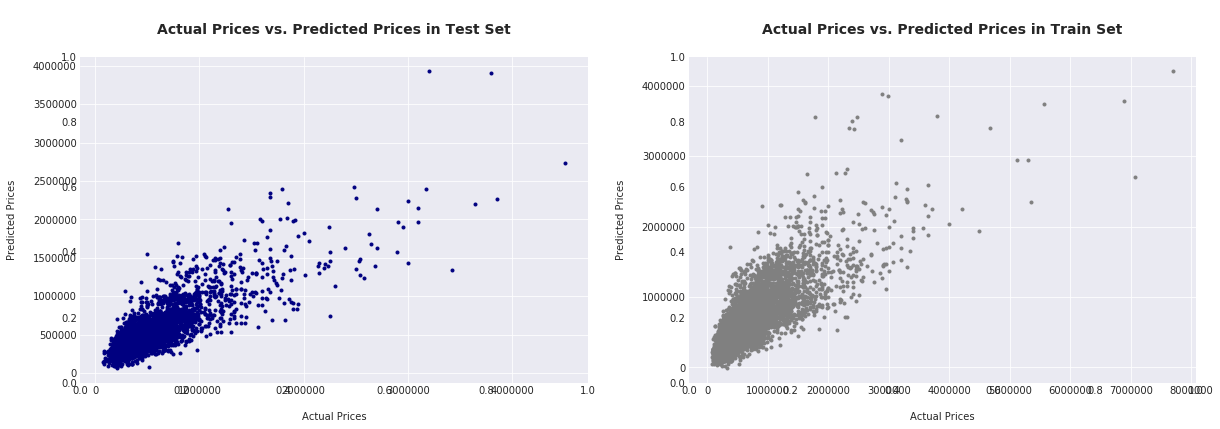

In [75]:
# apply the model to predict prices for test data
y_pred_test = lm.predict(X_test)

fig, ax = plt.subplots(1,2, figsize=(20, 6))

# visualize the differences between actual values and predicted values in TEST data
ax1 = fig.add_subplot(121)
ax1.scatter(y_test, y_pred_test, marker='.', c='navy')
ax1.set_xlabel("\nActual Prices")
ax1.set_ylabel("Predicted Prices\n")
ax1.set_title("\nActual Prices vs. Predicted Prices in Test Set\n", size=14, weight='bold')

# apply the model to predict prices for test data
y_pred_train = lm.predict(X_train)

# visualize the differences between actual values and predicted values in TRAIN data
ax2 = fig.add_subplot(122)
ax2.scatter(y_train, y_pred_train, marker='.', c='grey')
ax2.set_xlabel("\nActual Prices")
ax2.set_ylabel("Predicted Prices\n")
ax2.set_title("\nActual Prices vs. Predicted Prices in Train Set\n", size=14, weight='bold');

**Ideally**, the scatter plot should create a **linear line**. Since the model does not fit 100% - and honestly not even close to 100% -, the scatter plot can't create a linear line. To check the level of error of a model, we calculate the residuals and the error measures:

In [76]:
# calculate residuals by hand
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test  - y_test

**There are several error measures:**

- The Mean Absolute Error **(MAE)** is the easiest to understand, because it's the average error.

- The Mean Squared Error **(MSE)** is the mean of the squared errors and more popular than MAE, because MSE "punishes" larger errors.

- And the Root Mean Squared Error **(RMSE)** is the square root of the mean of the squared errors.

RMSE indicates the **absolute fit of the model to the data** – how close the observed data points are to the model’s predicted values. Whereas R² is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the **standard deviation of the unexplained variance**, and has the useful property of **being in the same units as the response variable**. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [77]:
# calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE Train Set:", mse_train) 
print("MSE Test Set :", mse_test)

# calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("\nRMSE Train Set:", rmse_train)
print("RMSE Test Set:", rmse_test)

# calculate standard deviation of response variable
print("\nStD Target:", df.price.std())

MSE Train Set: 47090104570.65708
MSE Test Set : 42108485412.241516

RMSE Train Set: 217002.54507875498
RMSE Test Set: 205203.52192942868

StD Target: 367368.1401013936


If my test error were substantially worse then my train error, this would be a sign that my model doesn't generalize well to future cases. But this isn't the case, so I can assume, my model is generalizing quiet well.

### 4.5 - Cross Validation

A train/test-split does have its dangers  -  what if the split we make isn’t random? This will result in overfitting, even though we’re trying to avoid it! In order to prevent our data from overfitting, we can perform cross validation.

In [78]:
# import libraries
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_val_predict

In [79]:
# perform 5-fold cross validation with the final model and printing R^2
scores1 = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:")
print(scores1)

Cross-validated R² scores:
[0.6472458  0.6644165  0.66026776 0.64335347 0.64657022]


In [80]:
# printing 
scores2 = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated neg. MSE's:")
print(scores2)

Cross-validated neg. MSE's:
[-5.34763608e+10 -4.71156645e+10 -3.97533617e+10 -4.53379400e+10
 -4.86175247e+10]


### 4.6 - Assumptions of OLS Linear Regression (that can be only tested AFTER analysis)

Before shouting "Eureka" over our model, we should first check that further models assumptions are met:

### a) Normal Distribution of Residuals

OLS does not require that the error term follows a normal distribution to produce unbiased estimates with the minimum variance. However, satisfying this assumption allows you to perform statistical hypothesis testing and generate reliable confidence intervals and prediction intervals.

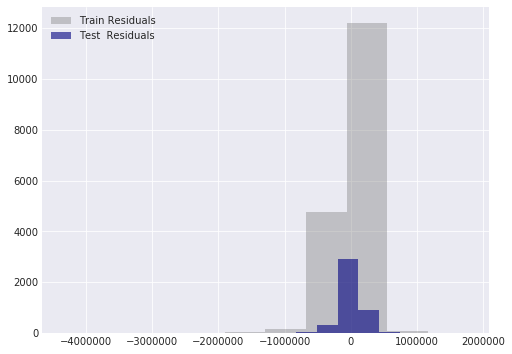

In [81]:
# plotting train and test residuals to check their distribution
plt.figure(figsize=(8,6))
plt.hist(train_residuals, color= 'gray', label='Train Residuals', alpha=0.4)
plt.hist(test_residuals, color='navy', label='Test  Residuals', alpha=0.6)
plt.legend(loc=2)
plt.show();

**Interpretation:**
- Yes: Both train and test residuals are normally distributed.

### b) Homoscedasticity of Residuals

This assumption requires the error term to be consistent for all observations. Homoscedasticity describes a situation in which the variance of the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) does not change for each observation or for a range of observations.

Heteroscedasticity (the violation of homoscedasticity) is present when the size of the error term differs across values of an independent variable. 

The easiest way to check this assumption is to create a residuals versus fitted value scatter plot. Heteroscedasticity would appear as a cone shape where the spread of the residuals increases in one direction.

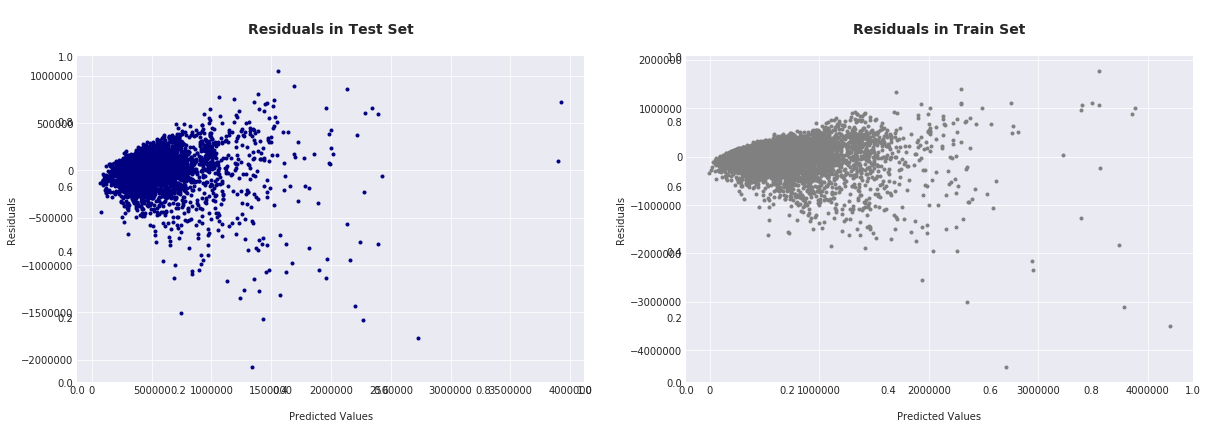

In [82]:
# plotting residuals in a scatterplot to check their variance
fig, ax = plt.subplots(1,2, figsize=(20, 6))

ax1 = fig.add_subplot(121)
ax1.scatter(x=y_pred_test, y=test_residuals, c='navy', marker='.')
ax1.set_title('\nResiduals in Test Set\n', size=14, weight='bold')
ax1.set_xlabel('\nPredicted Values\n')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(122)
ax2.scatter(x=y_pred_train, y=train_residuals, c='grey', marker='.')
ax2.set_title('\nResiduals in Train Set\n', size=14, weight='bold')
ax2.set_xlabel('\nPredicted Values\n')
ax2.set_ylabel('Residuals');

**Interpretation:**
- The scatterplots for both train and test residuals **show heteroscedasticity**. So one of our assumptions for linear regression is violated.
- The problem that heteroscedasticity presents for regression models is simple: The ordinary least-squares (OLS) regression seeks to minimize residuals and in turn produce the smallest possible standard errors. By definition, OLS regression gives equal weight to all observations, but when heteroscedasticity is present, the cases with larger disturbances have more “pull” than other observations. In this case, weighted least squares regression would be more appropriate, as it down-weights those observations with larger disturbances.
- We'll have to keep that in mind!

## 5 - Interpreting the data
### **5.1 - How good is my final model?**

When we use regression to make predictions, our goal is to produce predictions that are both correct on average and close to the real values. In other words, **we need predictions that are both unbiased and precise.**

Bias Measures
- One of the most important things is to assess the **residual plots**. If one sees patterns in the residual plots, you know that your model is not 100% correct.
- Although my model produced normally distributed residuals, their variability were unequal across the range of fitted values (heteroscedasticity). Therefore I keep calm and collected assuming my model not to be completely correct or efficient.
- The **p-values** indicate whether a relationship is statistically significant. The p-values for all included independent variables were significant and less than 0.05.

Precision Measures
- The **R-squared** as a goodness-of-fit measure for linear regression models indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. This statistic measures the strength of the relationship between the model and the dependent variables on a convenient 0 – 100% scale.
- The R-squared for my model is around 65%, which is good (at least two-thirds!) but not great.

### **5.2 - What does my final model explain?**

In [83]:
# pair the feature names with the (sorted) coefficients calculated in the final model
pd.DataFrame(list(zip(feature_cols, lm.coef_)), columns=['Features', 'Estimated Coefficient']).sort_values(
    by='Estimated Coefficient', ascending=False)

,Features,Estimated Coefficient
13,grade_13,2.353862e+06
12,grade_12,9.043338e+05
6,waterfront_1.0,6.293265e+05
11,grade_11,3.367563e+05
24,yr_ren_cat_2000-2015,1.805996e+05
10,condition_5,1.201115e+05
23,yr_ren_cat_1990-1999,1.013509e+05
9,condition_4,6.627516e+04
1,floors,4.462554e+04
2,view,4.357928e+04



The coefficients in the equation define the nature of relationship between each independent variable and the dependent variable both in strength and direction.

One can see that **categorical variables** are most important: 
- The utmost importance of **grade** comes as no real surprise. To remember: This is an overall grade given to the housing unit, based on King County grading system. Houses provided with the highest grades (13 or 12) reach prices higher by 2,353,862 Dollar (!) resp. 904,333.80 Dollar compared to lower graded ones.
- A house located at the **waterfront** can expect to achieve about 629,326.50 Dollar more than a house not located that picturesque.
- The **renovation status (= yr_ren_cat_...)** plays also an important role which makes sense giving the meaning of grades. Recently renovated building are of more value than others - expressed in numbers: by roughly 180,599.60 Dollar.

Amongst **numerical variables** the floor appears first as predictor: 
- One **floor** more increases the price of a house on average by 44,625.54 Dollar.
- With every additional **visit of a house (= view**) the price goes up by 43,579.28 Dollar on average. 
- One **bedroom** more increases the price by averaged 17,317.06 and every added **square footage in the basement** boosts the value by averaged 116.70 Dollar.

### **5.3. - What about practical significance?**
The model I built explains at least 65%. Or should I better say: only 65%?

- The regression model essentially is this:

> **Dependent Variable = Deterministic Part + Stochastic Error**

- The deterministic component is the portion of the variation in the dependent variable that the independent variables explain: 65%.
- The stochastic error means just the unpredictable difference between the expected value and the observed value. In my model: 35%.
- The standard deviation of my mean error (expressed by the RMSE) is roughly 210,000. In other words: The predicted price could be in a range of 210,000 Dollar more or 210,000 Dollar less. That's exactly the unpredictable part!

> **House Price = 65% Predictable + 35% Unpredictable**

- Let's sum up: I managed to build a model able to predict a house's price with 65% accuracy. No more, no less. You can work with my model but should no its limitations.
- You may also find some useful insights for sellers such as: To unlock some price potentials, consider renovations before you enter the market and make sure potential buyers view your home! 